# 1. Data Cleaning

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.core.indexes.base import default_pprint
from matplotlib import colors

### Loading raw data

In [80]:
# Load in data
df = pd.read_csv('Bullying_2018.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [81]:
# Handle null values
print(f'Number of rows before dropping nulls: {len(df)}')
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df = df.dropna()
print(f'Number of rows after dropping nulls: {len(df)}')

Number of rows before dropping nulls: 56981
Number of rows after dropping nulls: 32938


In [84]:
# Convert columns to binary
# Change Yes/No columns to 1/0
binary_columns = ['Bullied_on_school_property_in_past_12_months',
                  'Bullied_not_on_school_property_in_past_12_months',
                  'Cyber_bullied_in_past_12_months',
                  'Most_of_the_time_or_always_felt_lonely',
                  'Missed_classes_or_school_without_permission',
                  'Were_underweight',
                  'Were_overweight',
                  'Were_obese']
for col_i in binary_columns:
    df.loc[(df[col_i] == 'Yes'), col_i] = 1
    df.loc[(df[col_i] == 'No'), col_i] = 0
        
# Make sex binary
df.Sex[df.Sex == 'Male'] = 1
df.Sex[df.Sex == 'Female'] = 0

/var/folders/sh/841byyw54k523rbq64rc4qbr0000gn/T/ipykernel_19792/3646470034.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'Female'] = 0


In [85]:
# Change age strings to ints, drop string 'Custom_Age' and 'record' columns
df['Age'] = df['Custom_Age'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop(columns=['Custom_Age'])
df = df.drop(columns=['record'])

In [86]:
# Make frequency values numeric
def frequency(x):
    if x == 'Never':
        result = 0
    elif x == 'Rarely':
        result = 1
    elif x == 'Sometimes':
        result = 2
    elif x == 'Most of the time':
        result = 3
    elif x == 'Always':
        result = 4
    return result

df['Other_students_kind_and_helpful'] = df['Other_students_kind_and_helpful'].apply(lambda x: frequency(x))
df['Parents_understand_problems'] = df['Parents_understand_problems'].apply(lambda x: frequency(x))
df['Felt_lonely'] = df['Felt_lonely'].apply(lambda x: frequency(x))

In [87]:
# Close friends from object to int
df.loc[(df['Close_friends'] == '3 or more'), 'Close_friends'] = 3
df.loc[(df['Close_friends'] == '1'), 'Close_friends'] = 1
df.loc[(df['Close_friends'] == '2'), 'Close_friends'] = 2
df.loc[(df['Close_friends'] == '0'), 'Close_friends'] = 0

In [88]:
# Miss school no permission changed from string to sequential integers
df.loc[(df['Miss_school_no_permission'] == '0 days'), 'Miss_school_no_permission'] = 0
df.loc[(df['Miss_school_no_permission'] == '1 or 2 days'), 'Miss_school_no_permission'] = 1
df.loc[(df['Miss_school_no_permission'] == '3 to 5 days'), 'Miss_school_no_permission'] = 2
df.loc[(df['Miss_school_no_permission'] == '6 to 9 days'), 'Miss_school_no_permission'] = 3
df.loc[(df['Miss_school_no_permission'] == '10 or more days'), 'Miss_school_no_permission'] = 4

In [89]:
# Physically attacked from object to int 
df.loc[(df['Physically_attacked'] == '0 times'), 'Physically_attacked'] = 0
df.loc[(df['Physically_attacked'] == '1 time'), 'Physically_attacked'] = 1
df.loc[(df['Physically_attacked'] == '2 or 3 times'), 'Physically_attacked'] = 2
df.loc[(df['Physically_attacked'] == '4 or 5 times'), 'Physically_attacked'] = 3
df.loc[(df['Physically_attacked'] == '6 or 7 times'), 'Physically_attacked'] = 4
df.loc[(df['Physically_attacked'] == '8 or 9 times'), 'Physically_attacked'] = 5
df.loc[(df['Physically_attacked'] == '10 or 11 times'), 'Physically_attacked'] = 6
df.loc[(df['Physically_attacked'] == '12 or more times'), 'Physically_attacked'] = 7

In [90]:
# Physical_fighting from object to int 
df.loc[(df['Physical_fighting'] == '0 times'), 'Physical_fighting'] = 0
df.loc[(df['Physical_fighting'] == '1 time'), 'Physical_fighting'] = 1
df.loc[(df['Physical_fighting'] == '2 or 3 times'), 'Physical_fighting'] = 2
df.loc[(df['Physical_fighting'] == '4 or 5 times'), 'Physical_fighting'] = 3
df.loc[(df['Physical_fighting'] == '6 or 7 times'), 'Physical_fighting'] = 4
df.loc[(df['Physical_fighting'] == '8 or 9 times'), 'Physical_fighting'] = 5
df.loc[(df['Physical_fighting'] == '10 or 11 times'), 'Physical_fighting'] = 6
df.loc[(df['Physical_fighting'] == '12 or more times'), 'Physical_fighting'] = 7

### Create target variable: if child was bullied in any way
- on school property
- off school property
- cyber bullying

In [91]:
# Create column to see if child was bullied in any way
df['bullied'] = df['Bullied_on_school_property_in_past_12_months'] + df['Bullied_not_on_school_property_in_past_12_months'] + df['Cyber_bullied_in_past_12_months']
df['bullied'] = df['bullied'].apply(lambda x: [0 if x < 1 else 1][0])

In [92]:
###############################################################
### LINE COMMENTED OUT TO PREVENT SAVING OVER EXISTING FILE ###
# df.to_csv('cleaned_bullying.csv')                         ###
###############################################################

# 2. Exploratory Data Analysis

### 2.A Compare Splits for Children Bullied or Not
- 0: Not bullied
- 1: Bulliedt of child bullied

In [93]:
# See splits for children bullied in any way
df['bullied'].value_counts()

0    19553
1    13385
Name: bullied, dtype: int64

In [94]:
# See splits for children bullied off school property
df['Bullied_not_on_school_property_in_past_12_months'].value_counts()

0    25625
1     7313
Name: Bullied_not_on_school_property_in_past_12_months, dtype: int64

In [95]:
# See splits for children bulled on school property
df['Bullied_on_school_property_in_past_12_months'].value_counts()

0    26068
1     6870
Name: Bullied_on_school_property_in_past_12_months, dtype: int64

In [96]:
# See splits for cyber bullying
df['Cyber_bullied_in_past_12_months'].value_counts()

0    25558
1     7380
Name: Cyber_bullied_in_past_12_months, dtype: int64

### 2.B Variable correlations

In [97]:
# Convert all columns to integers
df_int = df[df.columns].astype(int)

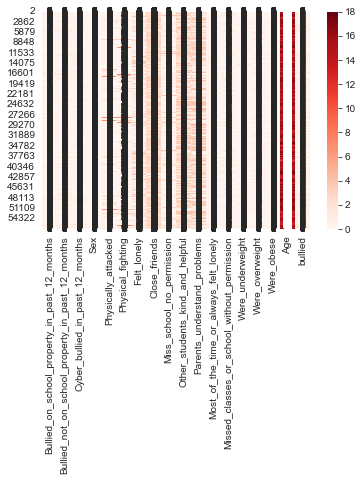

In [100]:
# Warning: this preliminary heatmap takes a long time to load!
sns.heatmap(df_int, annot=True, cmap="Reds")
plt.show()

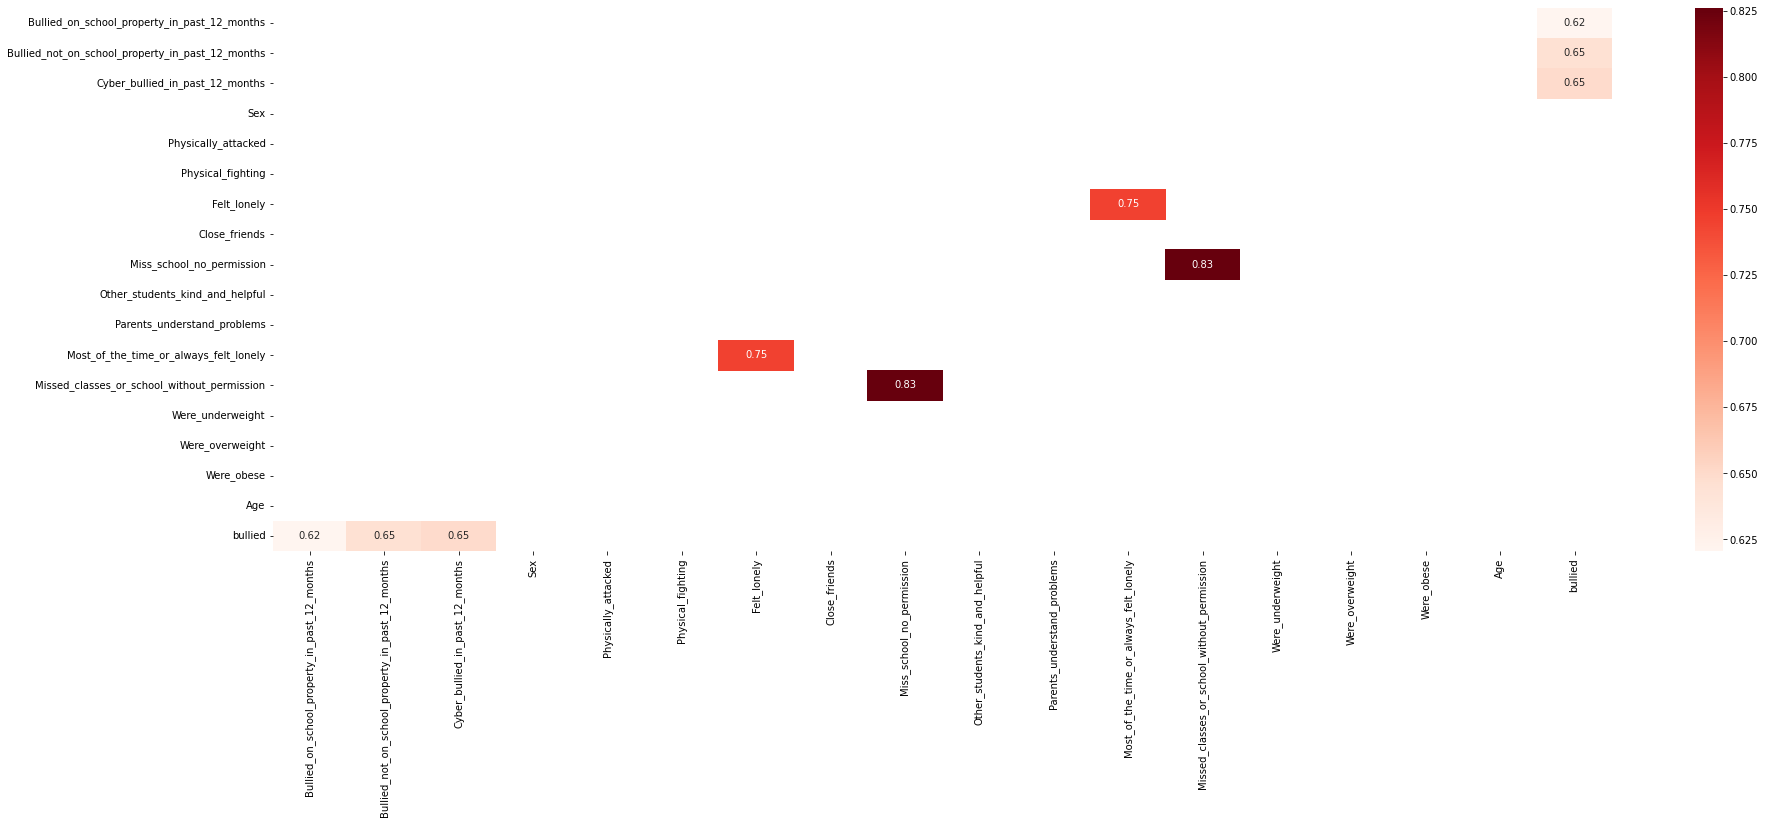

In [98]:
# Create correlation matrix with absolute values
corr_matrix = df_int.corr().abs()
threshold = 0.5
filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

# Plot correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

/var/folders/sh/841byyw54k523rbq64rc4qbr0000gn/T/ipykernel_19792/1104996482.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


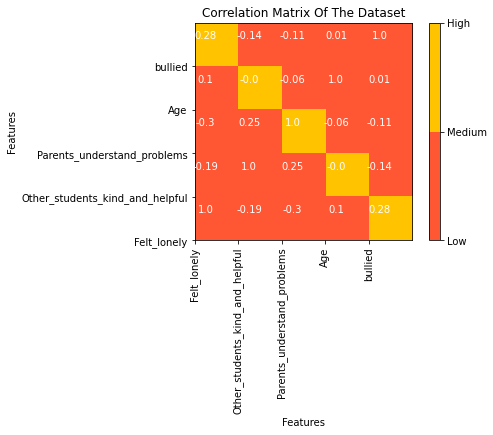

In [99]:
# Calculate correlation between columns
corr_matrix = df.corr()

# Create a custom color
# map with blue and green colors
colors_list = ['#FF5733', '#FFC300']
cmap = colors.ListedColormap(colors_list)

# Plot the heatmap with custom colors and annotations
plt.imshow(corr_matrix, cmap=cmap, vmin=0,
           vmax=1, extent=[0, 5, 0, 5])
for i in range(5):
    for j in range(5):
        plt.annotate(str(round(corr_matrix.values[i][j], 2)),
                     xy=(j+0.25, i+0.7),
                     ha='center', va='center', color='white')

# Add colorbar
cbar = plt.colorbar(ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

# Set plot title and axis labels
plt.title("Correlation Matrix Of The Dataset")
plt.xlabel("Features")
plt.ylabel("Features")

# Set tick labels
plt.xticks(range(len(corr_matrix.columns)),
           corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)),
           corr_matrix.columns)

# Display the plot
plt.show()

/var/folders/sh/841byyw54k523rbq64rc4qbr0000gn/T/ipykernel_19792/2847674925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


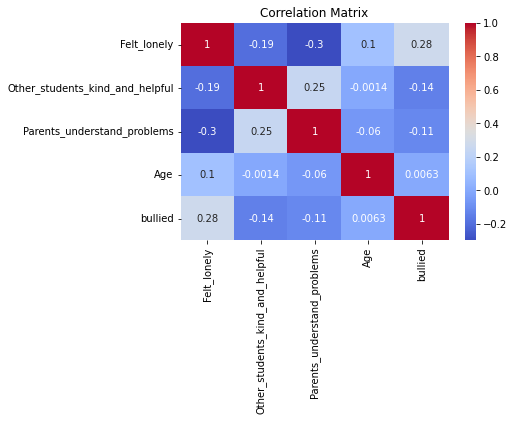

In [100]:
# Create correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

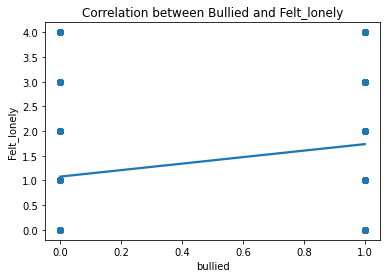

In [101]:
sns.regplot(x='bullied', y='Felt_lonely', data=df)
plt.title('Correlation between Bullied and Felt_lonely')
plt.show()

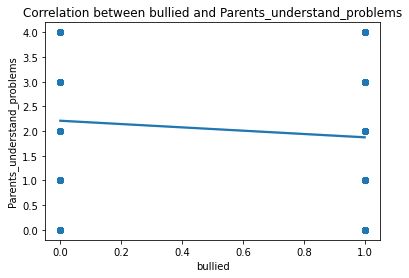

In [102]:
sns.regplot(x='bullied', y='Parents_understand_problems', data=df)
plt.title('Correlation between bullied and Parents_understand_problems')
plt.show()

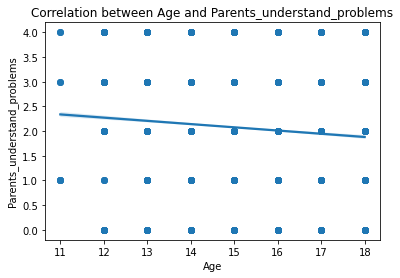

In [103]:
sns.regplot(x='Age', y='Parents_understand_problems', data=df)
plt.title('Correlation between Age and Parents_understand_problems')
plt.show()

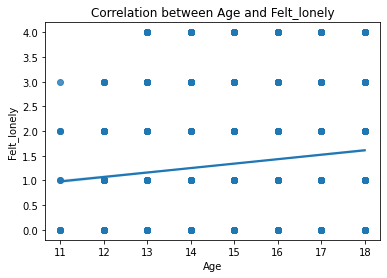

In [104]:
sns.regplot(x='Age', y='Felt_lonely', data=df)
plt.title('Correlation between Age and Felt_lonely')
plt.show()

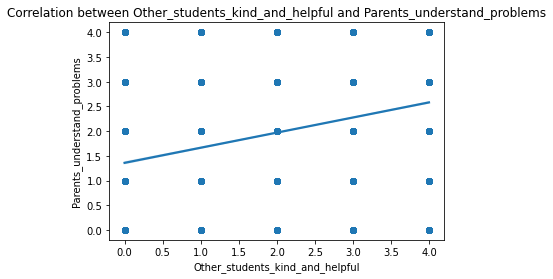

In [105]:
sns.regplot(x='Other_students_kind_and_helpful', y='Parents_understand_problems', data=df)
plt.title('Correlation between Other_students_kind_and_helpful and Parents_understand_problems')
plt.show()

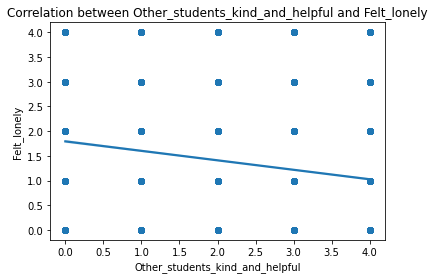

In [106]:
sns.regplot(x='Other_students_kind_and_helpful', y='Felt_lonely', data=df)
plt.title('Correlation between Other_students_kind_and_helpful and Felt_lonely')
plt.show()

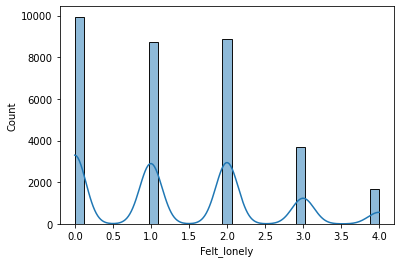

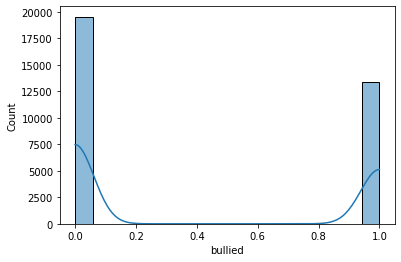

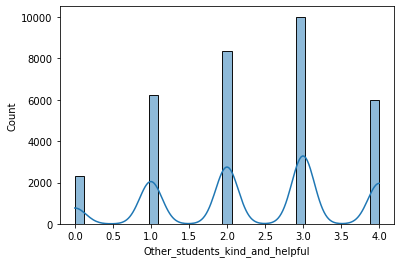

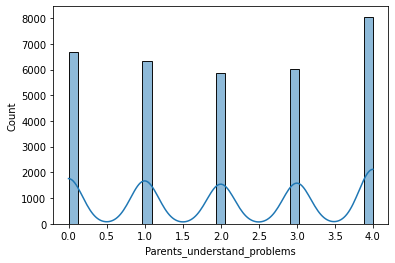

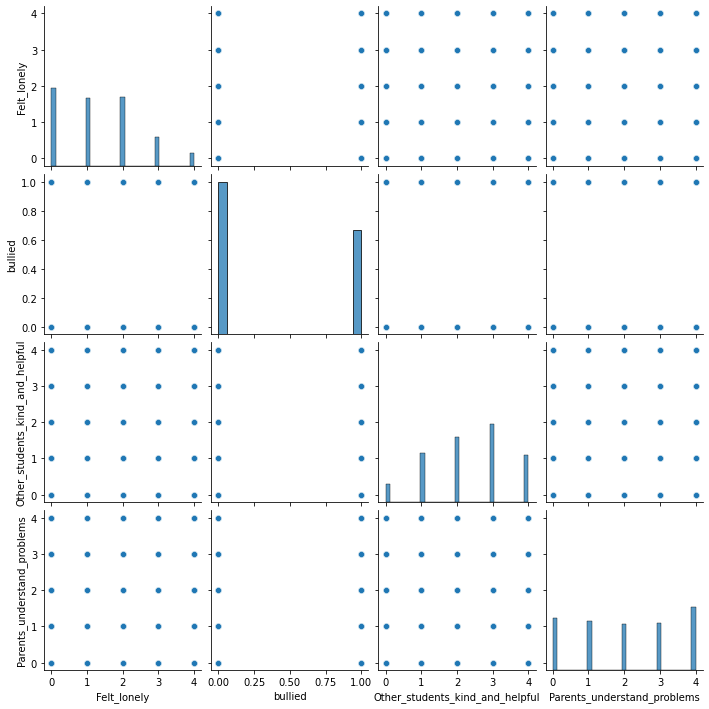

In [107]:
# Histogram and density plot of variable 1
sns.histplot(df['Felt_lonely'], kde=True)
plt.show()

# Histogram and density plot of variable 2
sns.histplot(df['bullied'], kde=True)
plt.show()

# Histogram and density plot of variable 3
sns.histplot(df['Other_students_kind_and_helpful'], kde=True)
plt.show()

# Histogram and density plot of variable 4
sns.histplot(df['Parents_understand_problems'], kde=True)
plt.show()

# Pair plot of variables 1-4
sns.pairplot(df[['Felt_lonely', 'bullied', 'Other_students_kind_and_helpful', 'Parents_understand_problems']])
plt.show()

In [108]:
# Compute VIF to detect multi-colinearity

def vif(dataset):
    """ works on numerical data only, and need to fillna priorly.
    """

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant

    vif_dataset = add_constant(dataset.dropna())

    vif_res = pd.DataFrame()
    vif_res['variables'] = vif_dataset.columns
    vif_res['VIF'] = [variance_inflation_factor(vif_dataset.values, i)
                          for i in range(len(vif_dataset.columns))]

    return vif_res

df_cleaned = pd.read_csv('cleaned_bullying.csv')
vif(df_cleaned)

/Users/alexherron/opt/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,variables,VIF
0,const,155.771589
1,Unnamed: 0,1.002011
2,Bullied_on_school_property_in_past_12_months,1.737052
3,Bullied_not_on_school_property_in_past_12_months,1.770173
4,Cyber_bullied_in_past_12_months,1.854630
5,Sex,1.158277
6,Physically_attacked,1.183446
7,Physical_fighting,1.173789
8,Felt_lonely,2.557992
9,Close_friends,1.071580


### 2.C Creation of EDA Class for Data Visualization

In [109]:
sns.set_style('darkgrid')

class EDA: 
    def __init__(self, data):
        self.data = data  
    
    def count_plot(self, varname, categorical):
        if categorical:
            ax = sns.countplot(x=self.data.loc[:,varname], data=self.data)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            plt.show()
        else: 
            plt.hist(self.data.loc[:,varname], bins = "fd")
            plt.axvline(self.data.loc[:,varname].mean(), color = "red", label = "mean")
            plt.xlabel(f"{varname}");
    
    def cross_count_plot(self, category1, category2):
        ax = sns.countplot(x = category1, hue = category2, data = self.data)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.show()
    
    def scatter_plot(self, numeric_x, numeric_y):
        plt.scatter(self.data.loc[:,numeric_x], self.data.loc[:,numeric_y])
        plt.xlabel(f"{numeric_x}")
        plt.ylabel(f"{numeric_y}");

In [110]:
df_EDA = EDA(df)

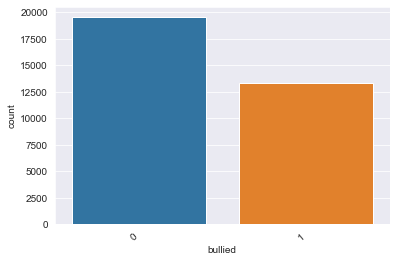

In [111]:
df_EDA.count_plot("bullied", True)

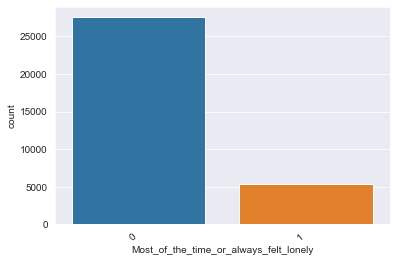

In [112]:
df_EDA.count_plot("Most_of_the_time_or_always_felt_lonely", True)

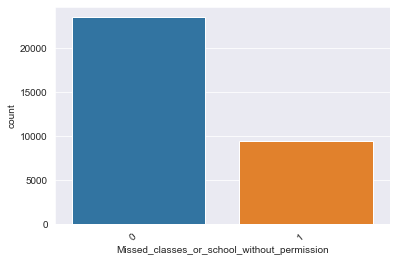

In [113]:
df_EDA.count_plot("Missed_classes_or_school_without_permission", True)

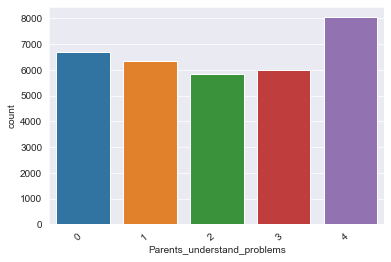

In [114]:
df_EDA.count_plot("Parents_understand_problems", True)

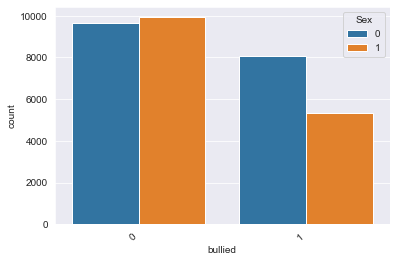

In [115]:
df_EDA.cross_count_plot("bullied", "Sex")

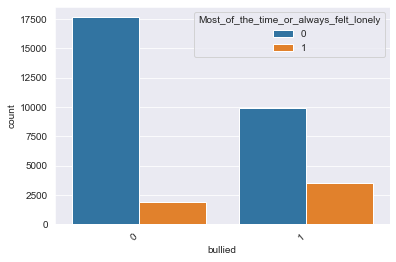

In [116]:
df_EDA.cross_count_plot("bullied", "Most_of_the_time_or_always_felt_lonely")

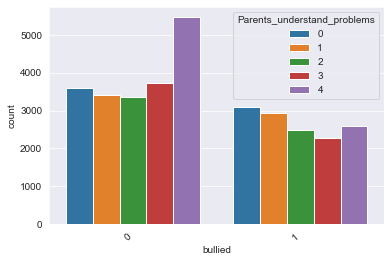

In [117]:
df_EDA.cross_count_plot("bullied", "Parents_understand_problems")

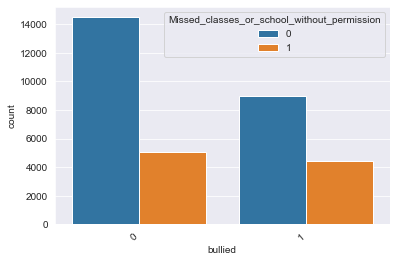

In [118]:
df_EDA.cross_count_plot("bullied", "Missed_classes_or_school_without_permission")

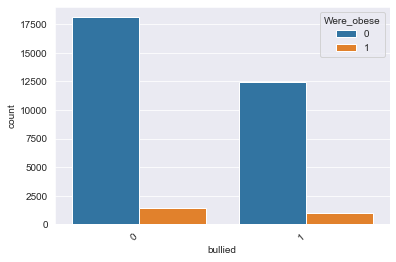

In [119]:
df_EDA.cross_count_plot("bullied", "Were_obese")

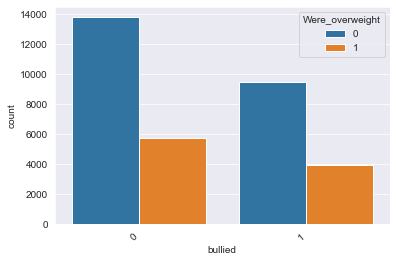

In [120]:
df_EDA.cross_count_plot("bullied", "Were_overweight")

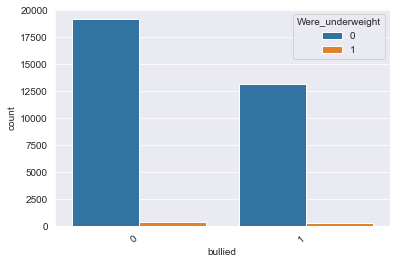

In [121]:
df_EDA.cross_count_plot("bullied", "Were_underweight")

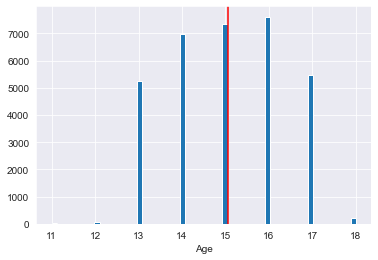

In [122]:
df_EDA.count_plot("Age", False)

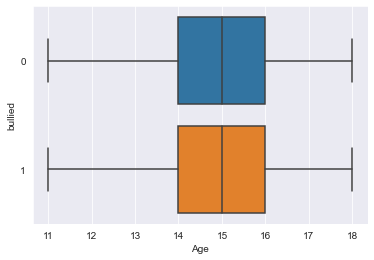

In [123]:
sns.boxplot(y = df['bullied'].astype('category'), x = "Age", data=df)
plt.show()

# 2.D VIF

In [124]:
# Compute VIF to detect multi-colinearity

def vif(dataset):
    """ works on numerical data only, and need to fillna priorly.
    """

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant

    vif_dataset = add_constant(dataset.dropna())

    vif_res = pd.DataFrame()
    vif_res['variables'] = vif_dataset.columns
    vif_res['VIF'] = [variance_inflation_factor(vif_dataset.values, i)
                          for i in range(len(vif_dataset.columns))]

    return vif_res

vif(df_cleaned)

,variables,VIF
0,const,155.771589
1,Unnamed: 0,1.002011
2,Bullied_on_school_property_in_past_12_months,1.737052
3,Bullied_not_on_school_property_in_past_12_months,1.770173
4,Cyber_bullied_in_past_12_months,1.854630
5,Sex,1.158277
6,Physically_attacked,1.183446
7,Physical_fighting,1.173789
8,Felt_lonely,2.557992
9,Close_friends,1.071580
